In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [22]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [23]:
#df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [24]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [25]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### quantile(0.025) on a pandas Series or DataFrame
#### it calculates the 2.5th percentile of the data. This means it finds the value below which 2.5% of the data falls.

In [26]:
# Clean the data by filtering out days when the page views were in the top 2.5% of
# the dataset or bottom 2.5% of the dataset.

# Filter out days in the top 2.5% and bottom 2.5%
top_threshold = df['value'].quantile(0.975)
bottom_threshold = df['value'].quantile(0.025)

# Filter to keep only the top 2.5% and bottom 2.5% of page views

df = df.loc[(df['value'] >= bottom_threshold) & (df['value'] <= top_threshold)]


print(top_threshold, bottom_threshold)

print(df)

177613.075 17876.4
             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


In [27]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: xlabel='date'>

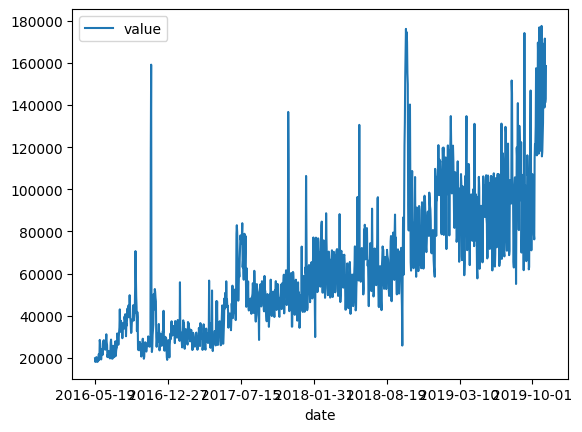

In [28]:
df.plot()

In [33]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(16, 9))  # Create a figure and axis
    df.plot(ax=ax, title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig
